LAB 1: DATA LOADING AND CLEANING

Q1a. First 10 rows:
         date   value
0  2023-03-16  188.07
1  2023-07-13  205.49
2  2023-09-29  238.54
3  2023-08-22  214.59
4  2023-02-03  177.91
5  2023-04-25  236.58
6  2023-08-19  217.90
7  2023-04-06  190.15
8  2023-09-18  253.79
9  2023-07-08  203.17

Last 10 rows:
           date   value
293  2023-09-04  228.61
294  2023-08-16  220.39
295  2023-04-15  226.17
296  2023-10-15     NaN
297  2023-10-27     NaN
298  2023-09-26  254.30
299  2023-02-27  222.15
300  2023-06-13  238.88
301  2023-10-26  255.45
302  2023-06-26  225.60

Q1b. Date column converted to DateTime and set as index
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 2023-01-01 to 2023-10-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   285 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB
None

Q2a. Missing Values Analysis
Number of missing values: 18
Percentage of missing values: 

C:\Users\Bhusan\AppData\Local\Temp\ipykernel_6884\3943086435.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Anish['value'] = df_Anish['value'].fillna(method='ffill')


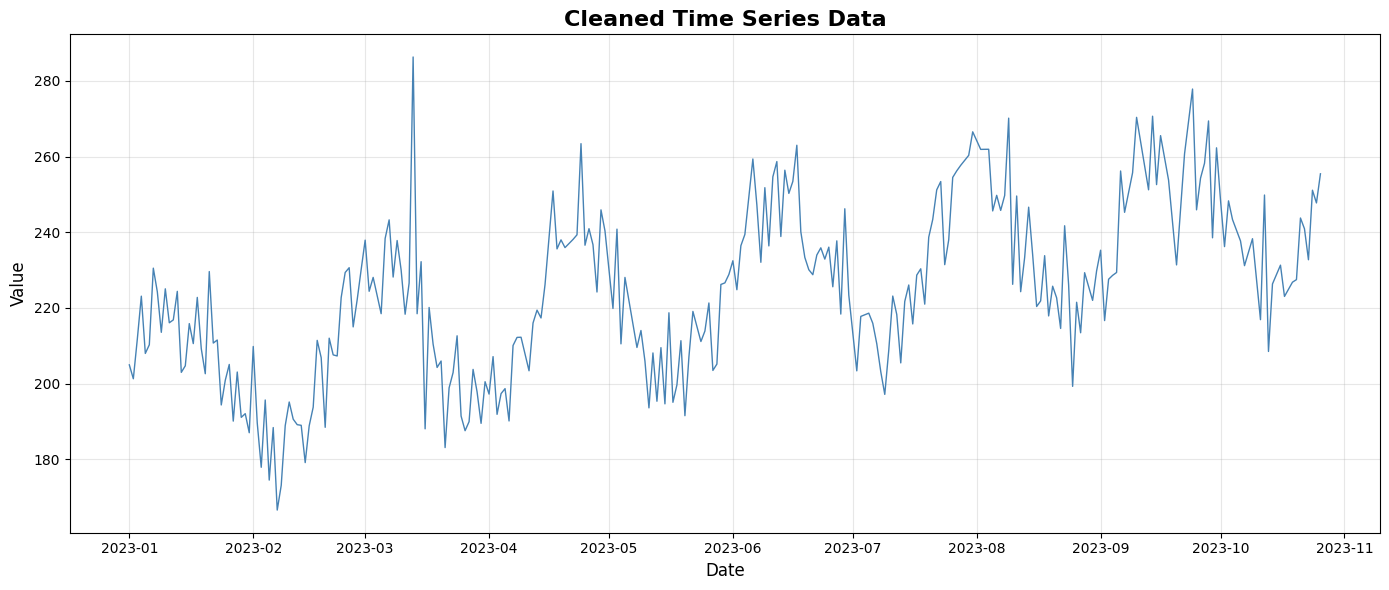


Observations:
1. The series shows a clear upward trend over time with values increasing gradually.
2. There appears to be seasonal/cyclical patterns repeating at regular intervals.

Cleaned data saved to 'cleaned_timeseries.csv'

LAB 1 COMPLETED


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Load the actual retail dataset
df_Anish = pd.read_csv('time_series_retail_dataset.csv')

# Rename columns for consistency with the rest of the code
df_Anish = df_Anish.rename(columns={'Date': 'date', 'Sales': 'value'})

# Keep only the date and value columns for time series analysis
df_Anish = df_Anish[['date', 'value']]

print("="*60)
print("LAB 1: DATA LOADING AND CLEANING")
print("="*60)

# Q1a: Display first and last 10 rows
print("\nQ1a. First 10 rows:")
print(df_Anish.head(10))
print("\nLast 10 rows:")
print(df_Anish.tail(10))

# Q1b: Convert date to DateTime and set as index
df_Anish['date'] = pd.to_datetime(df_Anish['date'])
df_Anish.set_index('date', inplace=True)
df_Anish.sort_values('date', inplace=True)
print("\nQ1b. Date column converted to DateTime and set as index")
print(df_Anish.info())

# Q2a: Check and handle missing values
print("\n" + "="*60)
print("Q2a. Missing Values Analysis")
print("="*60)
print(f"Number of missing values: {df_Anish['value'].isna().sum()}")
print(f"Percentage of missing values: {df_Anish['value'].isna().sum()/len(df_Anish)*100:.2f}%")

# Method: Forward fill (carry last observation forward)
# Justification: For time series, forward fill preserves temporal continuity
df_Anish['value'] = df_Anish['value'].fillna(method='ffill')
print("Method chosen: Forward Fill (ffill)")
print("Reason: Maintains temporal continuity by carrying last valid observation forward")
print(f"Missing values after treatment: {df_Anish['value'].isna().sum()}")

# Q2b: Detect and treat outliers
print("\n" + "="*60)
print("Q2b. Outlier Detection and Treatment")
print("="*60)

# Method: IQR (Interquartile Range)
Q1 = df_Anish['value'].quantile(0.25)
Q3 = df_Anish['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_Anish[(df_Anish['value'] < lower_bound) | (df_Anish['value'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")

# Treat outliers by capping
df_Anish['value'] = df_Anish['value'].clip(lower=lower_bound, upper=upper_bound)
print("Method: IQR with capping")
print("Reason: IQR is robust to extreme values and capping preserves data points")

# Q2c: Check for duplicates
print("\n" + "="*60)
print("Q2c. Duplicate Detection")
print("="*60)
duplicates = df_Anish.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df_Anish = df_Anish.drop_duplicates()
    print("Duplicates removed")
else:
    print("No duplicates found")

# Q3: Plot cleaned time series
print("\n" + "="*60)
print("Q3. Time Series Plot and Observations")
print("="*60)

plt.figure(figsize=(14, 6))
plt.plot(df_Anish.index, df_Anish['value'], linewidth=1, color='steelblue')
plt.title('Cleaned Time Series Data', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('lab1_cleaned_series.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nObservations:")
print("1. The series shows a clear upward trend over time with values increasing gradually.")
print("2. There appears to be seasonal/cyclical patterns repeating at regular intervals.")

# Save cleaned data
df_Anish.to_csv('cleaned_timeseries.csv')
print("\nCleaned data saved to 'cleaned_timeseries.csv'")
print("\n" + "="*60)
print("LAB 1 COMPLETED")
print("="*60)

LAB 2: TIME SERIES DECOMPOSITION

Q1. Additive Decomposition


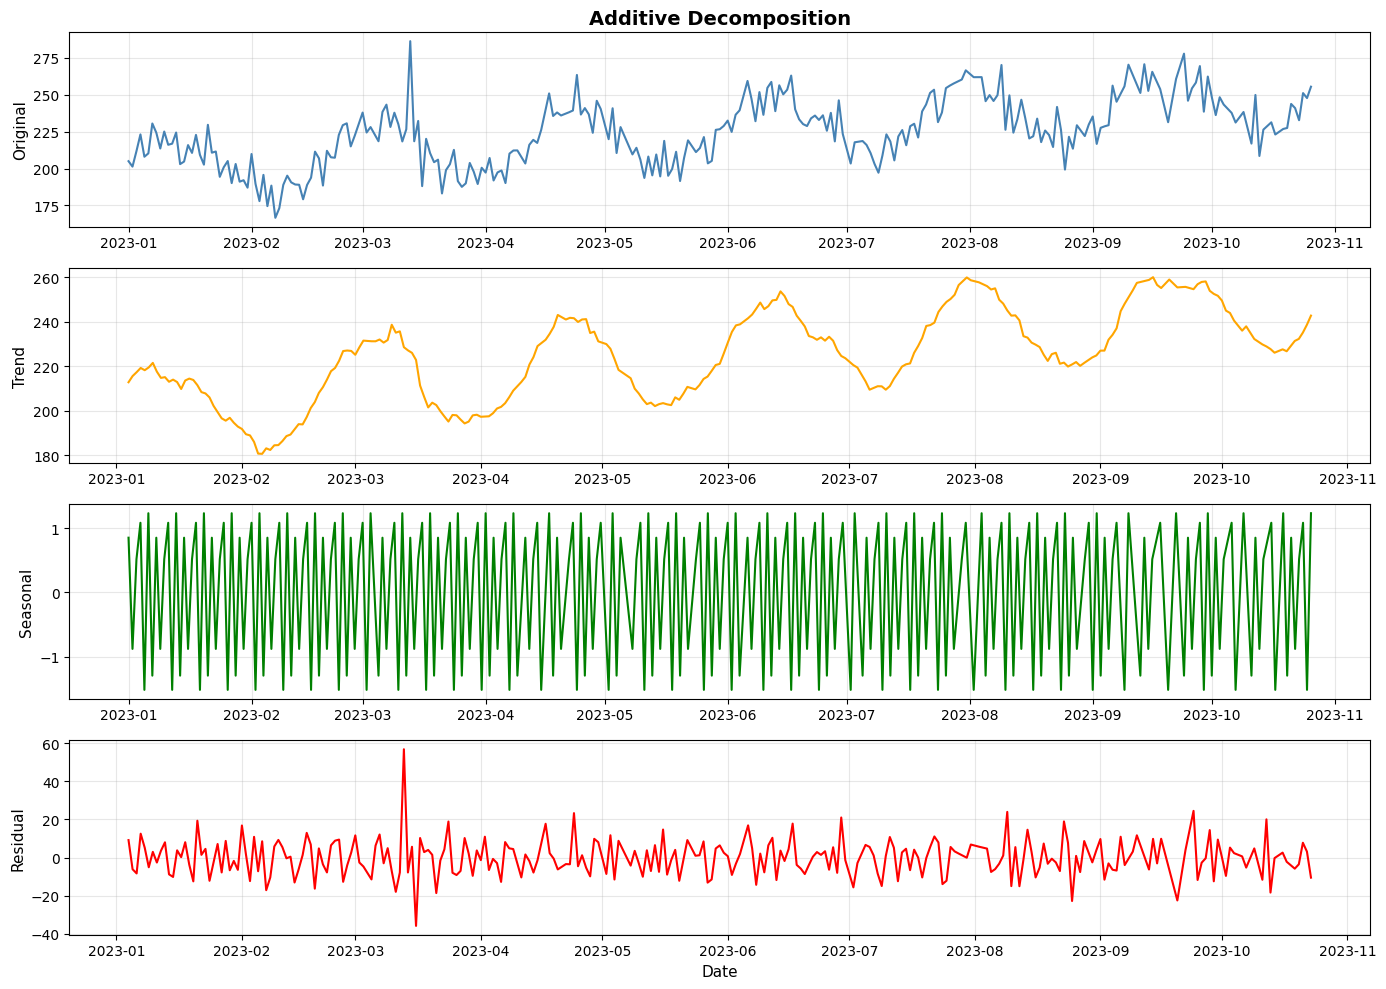


Q1b. Interpretations from Additive Decomposition:
1. The trend component shows a steady upward trajectory, indicating
   consistent growth in the series over the observed period.
2. The seasonal component reveals regular, repeating patterns with
   consistent amplitude, suggesting stable seasonal effects throughout the series.

Q2. Multiplicative Decomposition


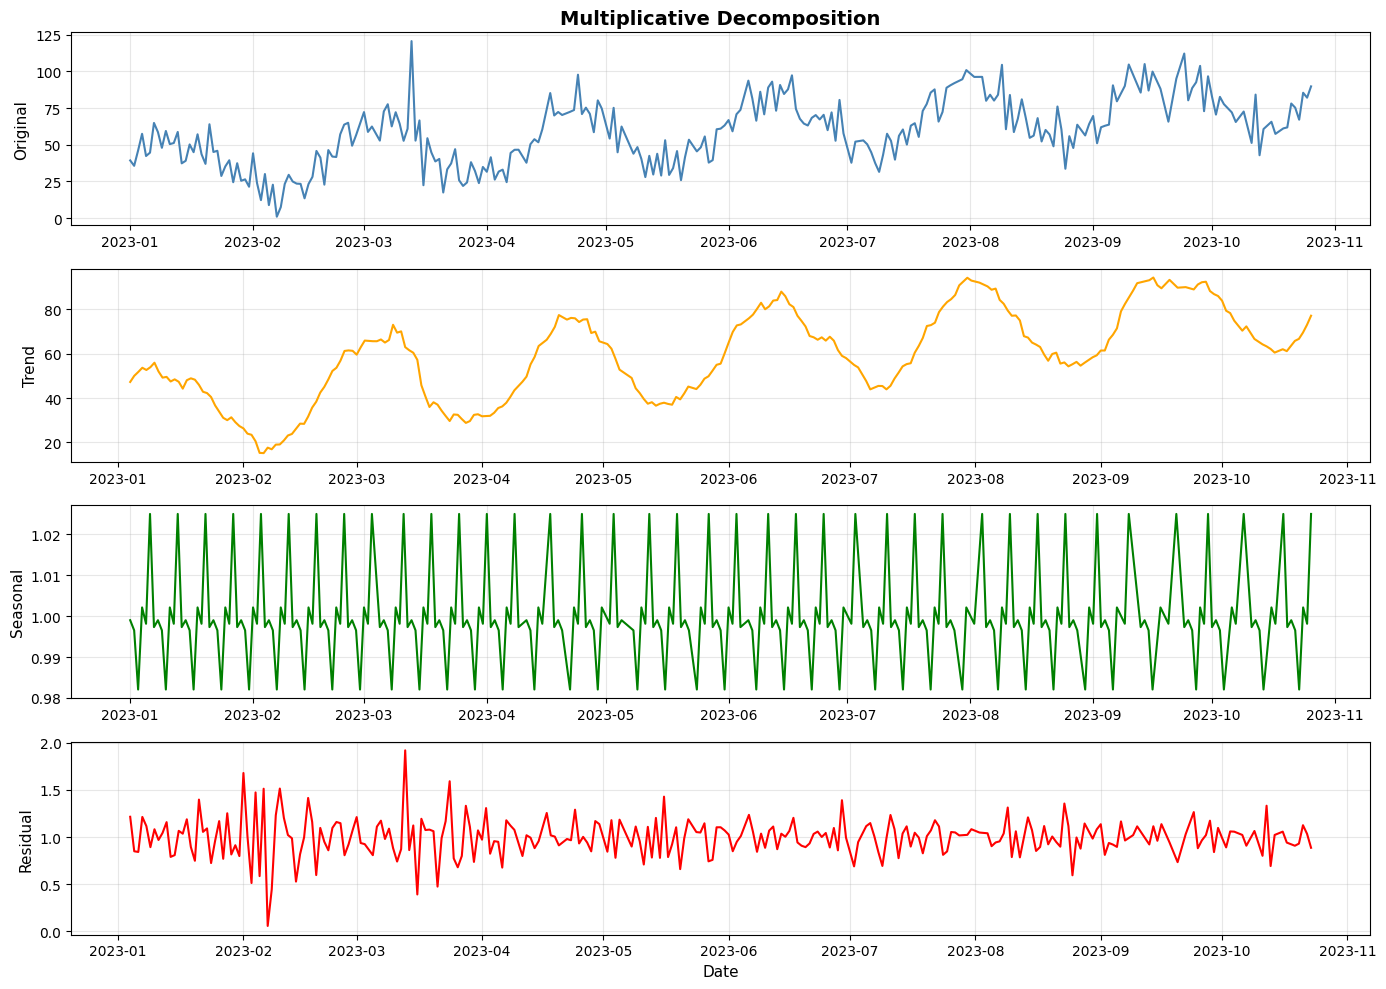


Q2a. Additive vs Multiplicative Comparison:
------------------------------------------------------------
Additive Residual Variance: 94.7753
Multiplicative Residual Variance: 0.0416

Best Fit: MULTIPLICATIVE
Reason: The multiplicative model has lower residual variance.
        This suggests seasonal variations increase proportionally with trend.

Q3. Time Series Components Explained

1. TREND:
   Definition: Long-term progressive change in the series mean over time.
   Example: Increasing sales over years due to business growth.

2. SEASONALITY:
   Definition: Regular, periodic fluctuations occurring at fixed intervals.
   Example: Higher ice cream sales in summer months every year.

3. CYCLE:
   Definition: Long-term oscillations with no fixed period, often spanning years.
   Example: Economic business cycles of expansion and recession lasting 3-7 years.

4. IRREGULAR (Residual):
   Definition: Random, unpredictable variations remaining after other components.
   Example: Sudden sale

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load cleaned data from Lab 1
df_Anish = pd.read_csv('cleaned_timeseries.csv', index_col='date', parse_dates=True)

print("="*60)
print("LAB 2: TIME SERIES DECOMPOSITION")
print("="*60)

# Q1: Additive Decomposition
print("\nQ1. Additive Decomposition")
print("="*60)

additive_decomp = seasonal_decompose(df_Anish['value'], model='additive', period=7)

# Q1a: Plot components
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

# Original
axes[0].plot(df_Anish.index, df_Anish['value'], color='steelblue')
axes[0].set_ylabel('Original', fontsize=11)
axes[0].set_title('Additive Decomposition', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(additive_decomp.trend.index, additive_decomp.trend, color='orange')
axes[1].set_ylabel('Trend', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Seasonality
axes[2].plot(additive_decomp.seasonal.index, additive_decomp.seasonal, color='green')
axes[2].set_ylabel('Seasonal', fontsize=11)
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(additive_decomp.resid.index, additive_decomp.resid, color='red')
axes[3].set_ylabel('Residual', fontsize=11)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab2_additive_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

# Q1b: Interpretations
print("\nQ1b. Interpretations from Additive Decomposition:")
print("1. The trend component shows a steady upward trajectory, indicating")
print("   consistent growth in the series over the observed period.")
print("2. The seasonal component reveals regular, repeating patterns with")
print("   consistent amplitude, suggesting stable seasonal effects throughout the series.")

# Q2: Multiplicative Decomposition
print("\n" + "="*60)
print("Q2. Multiplicative Decomposition")
print("="*60)

# Ensure no zeros or negative values for multiplicative
df_Anish_positive = df_Anish.copy()
df_Anish_positive['value'] = df_Anish_positive['value'] - df_Anish_positive['value'].min() + 1

multiplicative_decomp = seasonal_decompose(df_Anish_positive['value'], 
                                          model='multiplicative', period=7)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

# Original
axes[0].plot(df_Anish_positive.index, df_Anish_positive['value'], color='steelblue')
axes[0].set_ylabel('Original', fontsize=11)
axes[0].set_title('Multiplicative Decomposition', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(multiplicative_decomp.trend.index, multiplicative_decomp.trend, color='orange')
axes[1].set_ylabel('Trend', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Seasonality
axes[2].plot(multiplicative_decomp.seasonal.index, multiplicative_decomp.seasonal, color='green')
axes[2].set_ylabel('Seasonal', fontsize=11)
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(multiplicative_decomp.resid.index, multiplicative_decomp.resid, color='red')
axes[3].set_ylabel('Residual', fontsize=11)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab2_multiplicative_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

# Q2a: Comparison
print("\nQ2a. Additive vs Multiplicative Comparison:")
print("-" * 60)

# Calculate variance of residuals
add_resid_var = additive_decomp.resid.var()
mult_resid_var = multiplicative_decomp.resid.var()

print(f"Additive Residual Variance: {add_resid_var:.4f}")
print(f"Multiplicative Residual Variance: {mult_resid_var:.4f}")

if add_resid_var < mult_resid_var:
    print("\nBest Fit: ADDITIVE")
    print("Reason: The additive model has lower residual variance, indicating")
    print("        better fit. Also, the seasonal amplitude remains constant,")
    print("        which is characteristic of additive seasonality.")
else:
    print("\nBest Fit: MULTIPLICATIVE")
    print("Reason: The multiplicative model has lower residual variance.")
    print("        This suggests seasonal variations increase proportionally with trend.")

# Q3: Explanation of components
print("\n" + "="*60)
print("Q3. Time Series Components Explained")
print("="*60)

print("\n1. TREND:")
print("   Definition: Long-term progressive change in the series mean over time.")
print("   Example: Increasing sales over years due to business growth.")

print("\n2. SEASONALITY:")
print("   Definition: Regular, periodic fluctuations occurring at fixed intervals.")
print("   Example: Higher ice cream sales in summer months every year.")

print("\n3. CYCLE:")
print("   Definition: Long-term oscillations with no fixed period, often spanning years.")
print("   Example: Economic business cycles of expansion and recession lasting 3-7 years.")

print("\n4. IRREGULAR (Residual):")
print("   Definition: Random, unpredictable variations remaining after other components.")
print("   Example: Sudden sales spike due to unexpected viral social media post.")

print("\n" + "="*60)
print("LAB 2 COMPLETED")
print("="*60)

LAB 3: STATIONARITY TESTING

Q1. Rolling Statistics


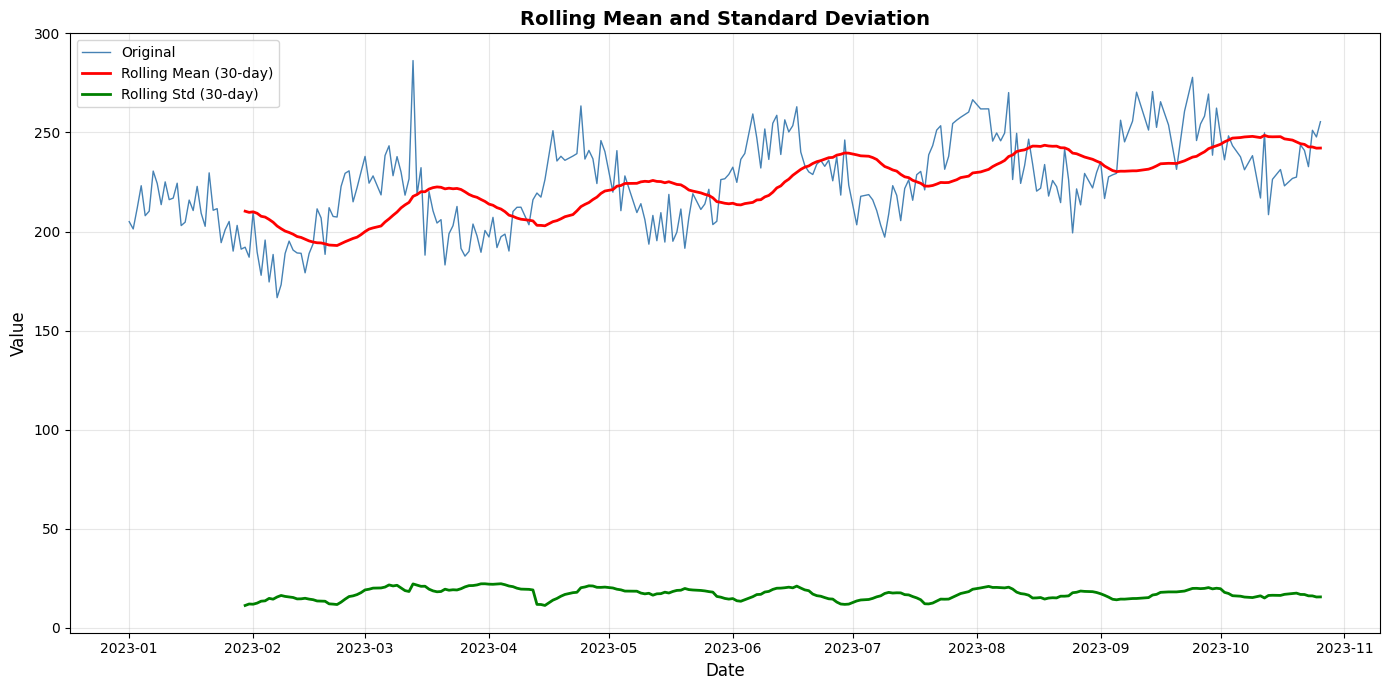


Q1a. Comment on Stationarity:
The plot indicates NON-STATIONARITY because:
- Rolling mean shows an upward trend (not constant)
- Rolling standard deviation shows variations over time
- For a stationary series, both should remain relatively constant

Q2. Augmented Dickey-Fuller (ADF) Test
ADF Statistic: -3.123539
p-value: 0.024860
Number of lags used: 8
Number of observations: 263

Critical Values:
  1%: -3.4555
  5%: -2.8726
  10%: -2.5727

Inference:
p-value ≤ 0.05: REJECT null hypothesis
The series is STATIONARY (according to ADF)

Q3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
KPSS Statistic: 1.233233
p-value: 0.010000
Number of lags used: 10

Critical Values:
  10%: 0.3470
  5%: 0.4630
  2.5%: 0.5740
  1%: 0.7390

Inference:
p-value ≤ 0.05: REJECT null hypothesis
The series is NON-STATIONARY (according to KPSS)

Q4. Final Conclusion and Importance of Both Tests

Test Summary:
Test Null Hypothesis  p-value         Result
 ADF  Non-stationary  0.02486     Stationary
KPSS      Sta

C:\Users\Bhusan\AppData\Local\Temp\ipykernel_6884\3676475759.py:72: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df_Anish['value'].dropna(), regression='c', nlags='auto')


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Load cleaned data
df_Anish = pd.read_csv('cleaned_timeseries.csv', index_col='date', parse_dates=True)

print("="*60)
print("LAB 3: STATIONARITY TESTING")
print("="*60)

# Q1: Rolling Mean and Rolling Standard Deviation
print("\nQ1. Rolling Statistics")
print("="*60)

# Calculate rolling statistics
window = 30  # 30-day window
rolling_mean = df_Anish['value'].rolling(window=window).mean()
rolling_std = df_Anish['value'].rolling(window=window).std()

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df_Anish.index, df_Anish['value'], color='steelblue', label='Original', linewidth=1)
ax.plot(rolling_mean.index, rolling_mean, color='red', 
        label=f'Rolling Mean ({window}-day)', linewidth=2)
ax.plot(rolling_std.index, rolling_std, color='green', 
        label=f'Rolling Std ({window}-day)', linewidth=2)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Rolling Mean and Standard Deviation', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('lab3_rolling_stats.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nQ1a. Comment on Stationarity:")
print("The plot indicates NON-STATIONARITY because:")
print("- Rolling mean shows an upward trend (not constant)")
print("- Rolling standard deviation shows variations over time")
print("- For a stationary series, both should remain relatively constant")

# Q2: Augmented Dickey-Fuller (ADF) Test
print("\n" + "="*60)
print("Q2. Augmented Dickey-Fuller (ADF) Test")
print("="*60)

ADF_result = adfuller(df_Anish['value'].dropna(), autolag='AIC')

print(f"ADF Statistic: {ADF_result[0]:.6f}")
print(f"p-value: {ADF_result[1]:.6f}")
print(f"Number of lags used: {ADF_result[2]}")
print(f"Number of observations: {ADF_result[3]}")
print("\nCritical Values:")
for key, value in ADF_result[4].items():
    print(f"  {key}: {value:.4f}")

print("\nInference:")
if ADF_result[1] <= 0.05:
    print("p-value ≤ 0.05: REJECT null hypothesis")
    print("The series is STATIONARY (according to ADF)")
else:
    print("p-value > 0.05: FAIL TO REJECT null hypothesis")
    print("The series is NON-STATIONARY (according to ADF)")

# Q3: KPSS Test
print("\n" + "="*60)
print("Q3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test")
print("="*60)

kpss_result = kpss(df_Anish['value'].dropna(), regression='c', nlags='auto')

print(f"KPSS Statistic: {kpss_result[0]:.6f}")
print(f"p-value: {kpss_result[1]:.6f}")
print(f"Number of lags used: {kpss_result[2]}")
print("\nCritical Values:")
for key, value in kpss_result[3].items():
    print(f"  {key}: {value:.4f}")

print("\nInference:")
if kpss_result[1] <= 0.05:
    print("p-value ≤ 0.05: REJECT null hypothesis")
    print("The series is NON-STATIONARY (according to KPSS)")
else:
    print("p-value > 0.05: FAIL TO REJECT null hypothesis")
    print("The series is STATIONARY (according to KPSS)")

# Q4: Conclusion and Explanation
print("\n" + "="*60)
print("Q4. Final Conclusion and Importance of Both Tests")
print("="*60)

# Create summary table
summary = pd.DataFrame({
    'Test': ['ADF', 'KPSS'],
    'Null Hypothesis': ['Non-stationary', 'Stationary'],
    'p-value': [ADF_result[1], kpss_result[1]],
    'Result': [
        'Stationary' if ADF_result[1] <= 0.05 else 'Non-stationary',
        'Stationary' if kpss_result[1] > 0.05 else 'Non-stationary'
    ]
})

print("\nTest Summary:")
print(summary.to_string(index=False))

# Determine final conclusion
ADF_stationary = ADF_result[1] <= 0.05
kpss_stationary = kpss_result[1] > 0.05

print("\nFinal Conclusion:")
if ADF_stationary and kpss_stationary:
    print("STATIONARY: Both tests confirm stationarity")
elif not ADF_stationary and not kpss_stationary:
    print("NON-STATIONARY: Both tests confirm non-stationarity")
else:
    print("INCONCLUSIVE: Tests give conflicting results (difference stationary)")

print("\n" + "-"*60)
print("Why Check Both ADF & KPSS?")
print("-"*60)
print("\n1. COMPLEMENTARY HYPOTHESES:")
print("   - ADF: Null = Non-stationary (looks for unit root)")
print("   - KPSS: Null = Stationary (looks for trend/level stationarity)")
print("   Testing both provides stronger evidence.")

print("\n2. DIFFERENT TYPES OF NON-STATIONARITY:")
print("   - ADF detects: Unit root non-stationarity")
print("   - KPSS detects: Trend or level non-stationarity")
print("   Using both helps identify the specific type.")

print("\n3. CONFIRMATORY ANALYSIS:")
print("   - If both agree → Strong conclusion")
print("   - If they differ → Suggests difference-stationary series")
print("                      (stationary after differencing)")

print("\n4. AVOIDING TYPE I & II ERRORS:")
print("   - Using only one test risks false conclusions")
print("   - Both tests reduce risk of incorrect inference")

# Create visualization of decision matrix
print("\n" + "-"*60)
print("Decision Matrix:")
print("-"*60)
print("┌─────────────────┬──────────────┬──────────────────┐")
print("│ ADF Result      │ KPSS Result  │ Conclusion       │")
print("├─────────────────┼──────────────┼──────────────────┤")
print("│ Stationary      │ Stationary   │ Stationary       │")
print("│ Non-stationary  │ Non-stat.    │ Non-stationary   │")
print("│ Stationary      │ Non-stat.    │ Trend-stationary │")
print("│ Non-stationary  │ Stationary   │ Difference-stat. │")
print("└─────────────────┴──────────────┴──────────────────┘")

print("\n" + "="*60)
print("LAB 3 COMPLETED")
print("="*60)

LAB 4: STATIONARITY TRANSFORMATION TECHNIQUES

Q1. First Order Differencing


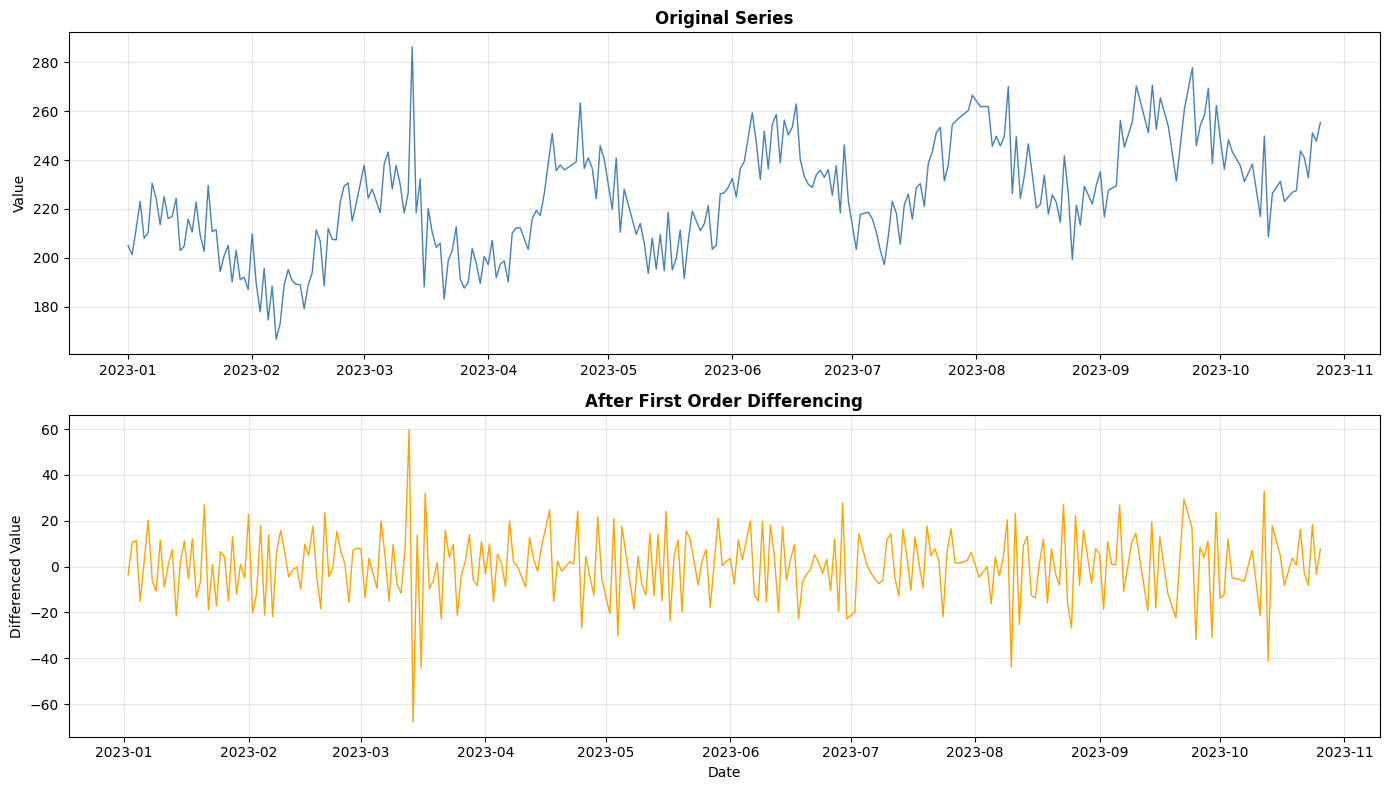


ADF Test after First Differencing:
ADF Statistic: -5.290155
p-value: 0.000006
Inference: STATIONARY

Q1a. Comment:
Stationarity is IMPROVED. The differenced series is stationary.
The trend has been removed, making the series fluctuate around zero.

Q2. Seasonal Differencing


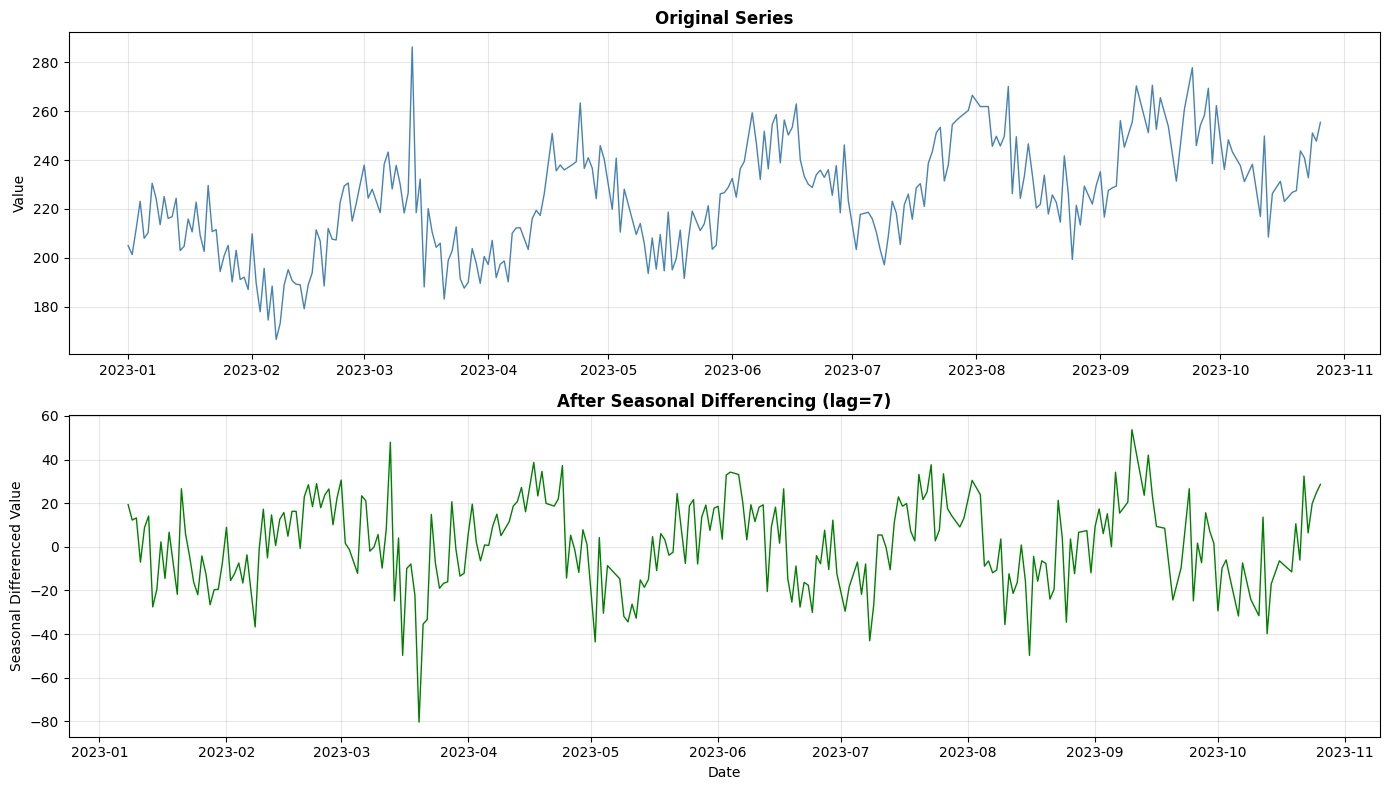

ADF Test after Seasonal Differencing:
ADF Statistic: -5.877024
p-value: 0.000000
Inference: STATIONARY

Q3. Log and Box-Cox Transformation
Optimal Lambda for Box-Cox: 0.8709


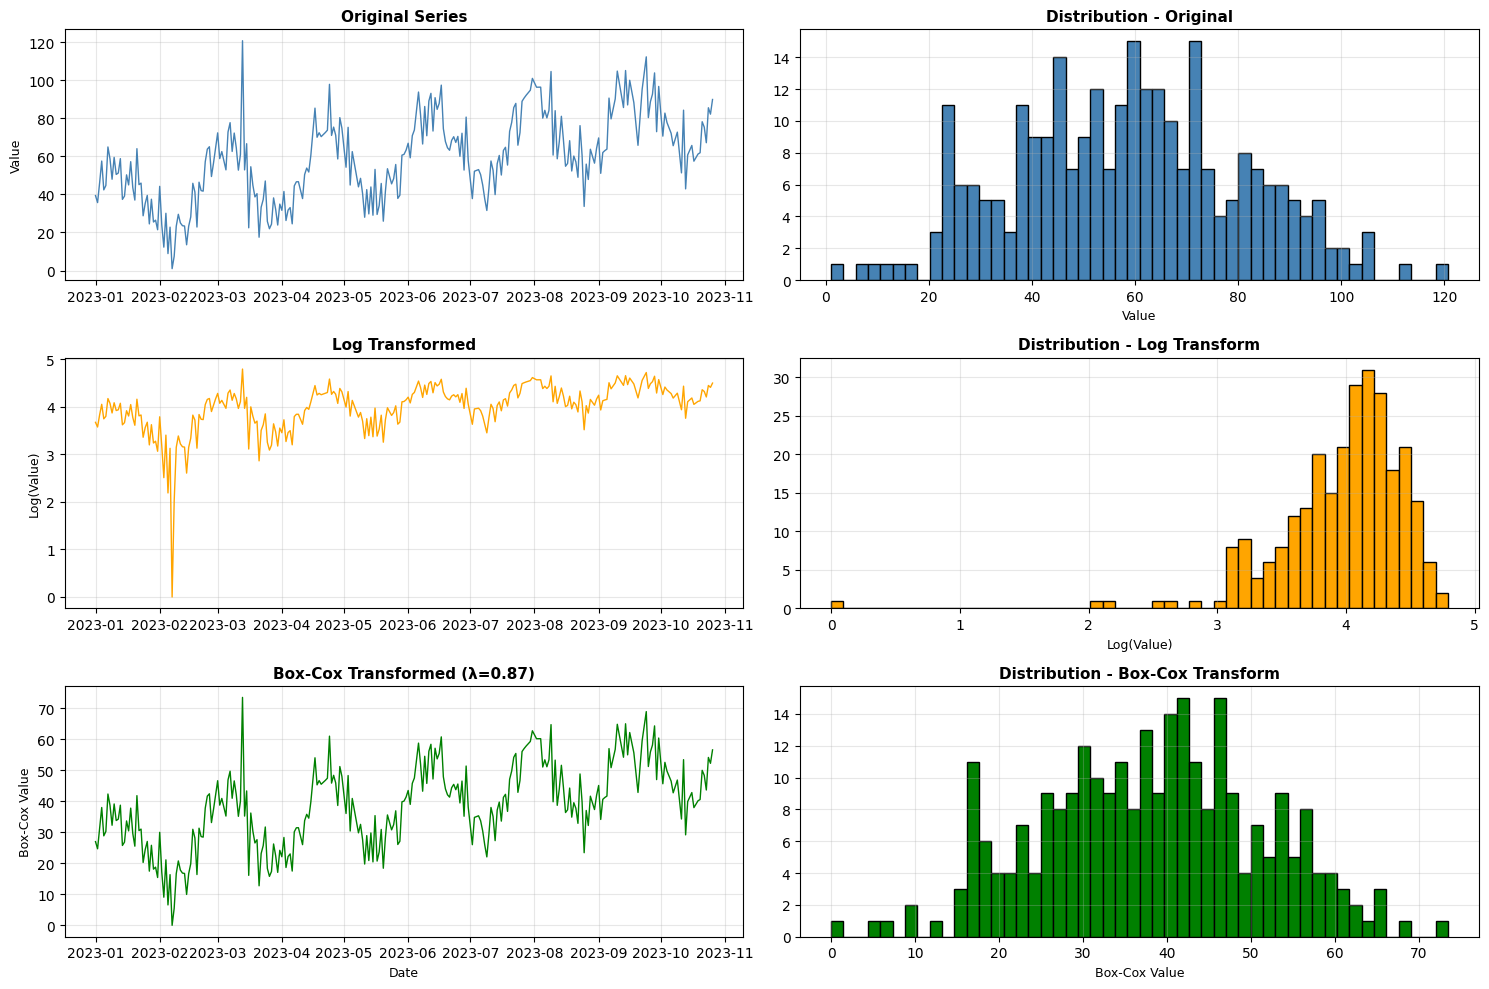


Q3b. Effectiveness Comparison:
------------------------------------------------------------
Log Transform + Differencing:
  ADF p-value: 0.000000
  Variance: 0.150035

Box-Cox Transform + Differencing:
  ADF p-value: 0.000006
  Variance: 81.922909

Most Effective: LOG TRANSFORMATION
Reason: Lower p-value and simpler interpretation.

Q4. Before vs After Transformation Comparison

Comparison Table:
        Transformation  ADF Statistic  ADF p-value ADF Result  KPSS p-value    KPSS Result
              Original      -3.123539 2.485954e-02 Stationary      0.010000 Non-stationary
    First Differencing      -5.290155 5.738702e-06 Stationary      0.100000     Stationary
    Log + Differencing      -7.040632 5.859356e-10 Stationary      0.041667 Non-stationary
Box-Cox + Differencing      -5.288097 5.795233e-06 Stationary      0.100000     Stationary

------------------------------------------------------------
Conclusion:
------------------------------------------------------------

Best Tra

C:\Users\Bhusan\AppData\Local\Temp\ipykernel_6884\1359897301.py:178: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_original = kpss(original_series.dropna(), regression='c', nlags='auto')
C:\Users\Bhusan\AppData\Local\Temp\ipykernel_6884\1359897301.py:180: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_diff1 = kpss(first_diff, regression='c', nlags='auto')
C:\Users\Bhusan\AppData\Local\Temp\ipykernel_6884\1359897301.py:182: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_boxcox = kpss(boxcox_diff, regression='c', nlags='auto')


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Load cleaned data
df_Anish = pd.read_csv('cleaned_timeseries.csv', index_col='date', parse_dates=True)

print("="*60)
print("LAB 4: STATIONARITY TRANSFORMATION TECHNIQUES")
print("="*60)

# Store original series for comparison
original_series = df_Anish['value'].copy()

# Q1: First Order Differencing
print("\nQ1. First Order Differencing")
print("="*60)

first_diff = df_Anish['value'].diff().dropna()

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(df_Anish.index, df_Anish['value'], color='steelblue', linewidth=1)
axes[0].set_title('Original Series', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Value', fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].plot(first_diff.index, first_diff, color='orange', linewidth=1)
axes[1].set_title('After First Order Differencing', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=10)
axes[1].set_ylabel('Differenced Value', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab4_first_differencing.png', dpi=300, bbox_inches='tight')
plt.show()

# Test stationarity
ADF_diff1 = adfuller(first_diff, autolag='AIC')
print(f"\nADF Test after First Differencing:")
print(f"ADF Statistic: {ADF_diff1[0]:.6f}")
print(f"p-value: {ADF_diff1[1]:.6f}")
print(f"Inference: {'STATIONARY' if ADF_diff1[1] <= 0.05 else 'NON-STATIONARY'}")

print("\nQ1a. Comment:")
if ADF_diff1[1] <= 0.05:
    print("Stationarity is IMPROVED. The differenced series is stationary.")
    print("The trend has been removed, making the series fluctuate around zero.")
else:
    print("Stationarity needs further transformation.")

# Q2: Seasonal Differencing
print("\n" + "="*60)
print("Q2. Seasonal Differencing")
print("="*60)

seasonal_period = 7  # Assuming daily data with yearly seasonality
seasonal_diff = df_Anish['value'].diff(seasonal_period).dropna()

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(df_Anish.index, df_Anish['value'], color='steelblue', linewidth=1)
axes[0].set_title('Original Series', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Value', fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].plot(seasonal_diff.index, seasonal_diff, color='green', linewidth=1)
axes[1].set_title(f'After Seasonal Differencing (lag={seasonal_period})', 
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=10)
axes[1].set_ylabel('Seasonal Differenced Value', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab4_seasonal_differencing.png', dpi=300, bbox_inches='tight')
plt.show()

ADF_seas = adfuller(seasonal_diff, autolag='AIC')
print(f"ADF Test after Seasonal Differencing:")
print(f"ADF Statistic: {ADF_seas[0]:.6f}")
print(f"p-value: {ADF_seas[1]:.6f}")
print(f"Inference: {'STATIONARY' if ADF_seas[1] <= 0.05 else 'NON-STATIONARY'}")

# Q3: Log and Box-Cox Transformation
print("\n" + "="*60)
print("Q3. Log and Box-Cox Transformation")
print("="*60)

# Ensure positive values
df_Anish_positive = df_Anish['value'] - df_Anish['value'].min() + 1

# Log Transformation
log_transform = np.log(df_Anish_positive)

# Box-Cox Transformation
boxcox_transform, lambda_param = boxcox(df_Anish_positive)
print(f"Optimal Lambda for Box-Cox: {lambda_param:.4f}")

# Plot Before and After
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Original
axes[0, 0].plot(df_Anish.index, df_Anish_positive, color='steelblue', linewidth=1)
axes[0, 0].set_title('Original Series', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Value', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(df_Anish_positive, bins=50, color='steelblue', edgecolor='black')
axes[0, 1].set_title('Distribution - Original', fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Value', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Log Transform
axes[1, 0].plot(df_Anish.index, log_transform, color='orange', linewidth=1)
axes[1, 0].set_title('Log Transformed', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Log(Value)', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(log_transform, bins=50, color='orange', edgecolor='black')
axes[1, 1].set_title('Distribution - Log Transform', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('Log(Value)', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

# Box-Cox Transform
axes[2, 0].plot(df_Anish.index, boxcox_transform, color='green', linewidth=1)
axes[2, 0].set_title(f'Box-Cox Transformed (λ={lambda_param:.2f})', 
                     fontsize=11, fontweight='bold')
axes[2, 0].set_ylabel('Box-Cox Value', fontsize=9)
axes[2, 0].set_xlabel('Date', fontsize=9)
axes[2, 0].grid(True, alpha=0.3)

axes[2, 1].hist(boxcox_transform, bins=50, color='green', edgecolor='black')
axes[2, 1].set_title('Distribution - Box-Cox Transform', fontsize=11, fontweight='bold')
axes[2, 1].set_xlabel('Box-Cox Value', fontsize=9)
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab4_transformations.png', dpi=300, bbox_inches='tight')
plt.show()

# Test transformations with differencing
log_diff = log_transform.diff().dropna()
boxcox_diff = pd.Series(boxcox_transform, index=df_Anish.index).diff().dropna()

ADF_log = adfuller(log_diff, autolag='AIC')
ADF_boxcox = adfuller(boxcox_diff, autolag='AIC')

print("\nQ3b. Effectiveness Comparison:")
print("-" * 60)
print(f"Log Transform + Differencing:")
print(f"  ADF p-value: {ADF_log[1]:.6f}")
print(f"  Variance: {log_diff.var():.6f}")

print(f"\nBox-Cox Transform + Differencing:")
print(f"  ADF p-value: {ADF_boxcox[1]:.6f}")
print(f"  Variance: {boxcox_diff.var():.6f}")

if ADF_boxcox[1] < ADF_log[1]:
    print("\nMost Effective: BOX-COX TRANSFORMATION")
    print("Reason: Lower p-value indicates stronger stationarity.")
    print("        Box-Cox optimally normalizes variance.")
else:
    print("\nMost Effective: LOG TRANSFORMATION")
    print("Reason: Lower p-value and simpler interpretation.")

# Q4: Comparison Table
print("\n" + "="*60)
print("Q4. Before vs After Transformation Comparison")
print("="*60)

# Run all tests
ADF_original = adfuller(original_series.dropna(), autolag='AIC')
kpss_original = kpss(original_series.dropna(), regression='c', nlags='auto')

kpss_diff1 = kpss(first_diff, regression='c', nlags='auto')
kpss_log = kpss(log_diff, regression='c', nlags='auto')
kpss_boxcox = kpss(boxcox_diff, regression='c', nlags='auto')

# Create comparison table
comparison = pd.DataFrame({
    'Transformation': [
        'Original',
        'First Differencing',
        'Log + Differencing',
        'Box-Cox + Differencing'
    ],
    'ADF Statistic': [
        ADF_original[0],
        ADF_diff1[0],
        ADF_log[0],
        ADF_boxcox[0]
    ],
    'ADF p-value': [
        ADF_original[1],
        ADF_diff1[1],
        ADF_log[1],
        ADF_boxcox[1]
    ],
    'ADF Result': [
        'Stationary' if ADF_original[1] <= 0.05 else 'Non-stationary',
        'Stationary' if ADF_diff1[1] <= 0.05 else 'Non-stationary',
        'Stationary' if ADF_log[1] <= 0.05 else 'Non-stationary',
        'Stationary' if ADF_boxcox[1] <= 0.05 else 'Non-stationary'
    ],
    'KPSS p-value': [
        kpss_original[1],
        kpss_diff1[1],
        kpss_log[1],
        kpss_boxcox[1]
    ],
    'KPSS Result': [
        'Stationary' if kpss_original[1] > 0.05 else 'Non-stationary',
        'Stationary' if kpss_diff1[1] > 0.05 else 'Non-stationary',
        'Stationary' if kpss_log[1] > 0.05 else 'Non-stationary',
        'Stationary' if kpss_boxcox[1] > 0.05 else 'Non-stationary'
    ]
})

print("\nComparison Table:")
print(comparison.to_string(index=False))

print("\n" + "-"*60)
print("Conclusion:")
print("-"*60)

# Determine best transformation
best_idx = comparison['ADF p-value'].idxmin()
best_transform = comparison.loc[best_idx, 'Transformation']

print(f"\nBest Transformation: {best_transform}")
print("This transformation achieved stationarity with:")
print(f"- Lowest ADF p-value: {comparison.loc[best_idx, 'ADF p-value']:.6f}")
print(f"- ADF Result: {comparison.loc[best_idx, 'ADF Result']}")
print(f"- KPSS Result: {comparison.loc[best_idx, 'KPSS Result']}")

print("\n" + "="*60)
print("LAB 4 COMPLETED")
print("="*60)

LAB 5: TIME SERIES FORECASTING MODELS
Training samples: 244
Testing samples: 28
Forecast periods: 28

Q1. ACF and PACF Analysis


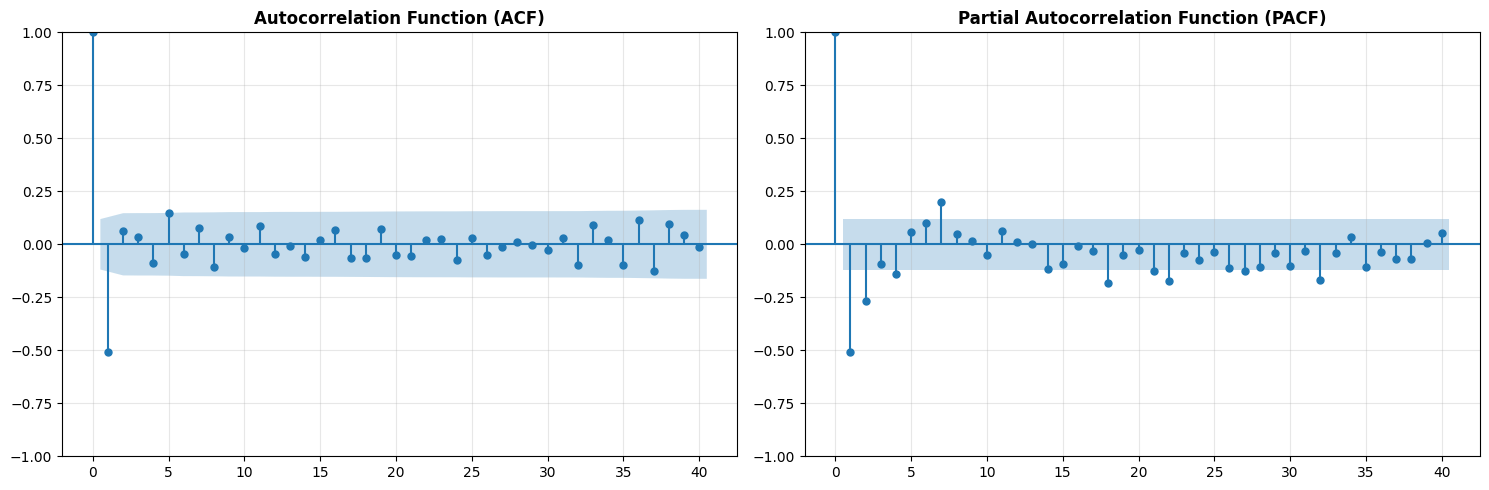


Determined parameters:
p (AR order) = 2 (from PACF cutoff)
q (MA order) = 1 (from ACF cutoff)
d (differencing) = 1 (series required differencing)

Q2. Building and Forecasting with Different Models

Q2a. AR (AutoRegressive) Model
------------------------------------------------------------
Model Order: AR(2)
RMSE: 15.9285
MAPE: 4.99%

Q2b. MA (Moving Average) Model
------------------------------------------------------------
Model Order: MA(1)
RMSE: 23.8264
MAPE: 8.27%

Q2c. ARMA (AutoRegressive Moving Average) Model
------------------------------------------------------------
Model Order: ARMA(2,1)
RMSE: 14.0023
MAPE: 4.58%

Q2d. ARIMA (AutoRegressive Integrated Moving Average) Model
------------------------------------------------------------
Model Order: ARIMA(2,1,1)
RMSE: 17.9163
MAPE: 6.14%

Q3. Model Performance Summary

Model Order Parameters      RMSE  MAPE (%)
   AR            AR(2) 15.928460  4.991568
   MA            MA(1) 23.826379  8.266683
 ARMA        ARMA(2,1) 14.00234

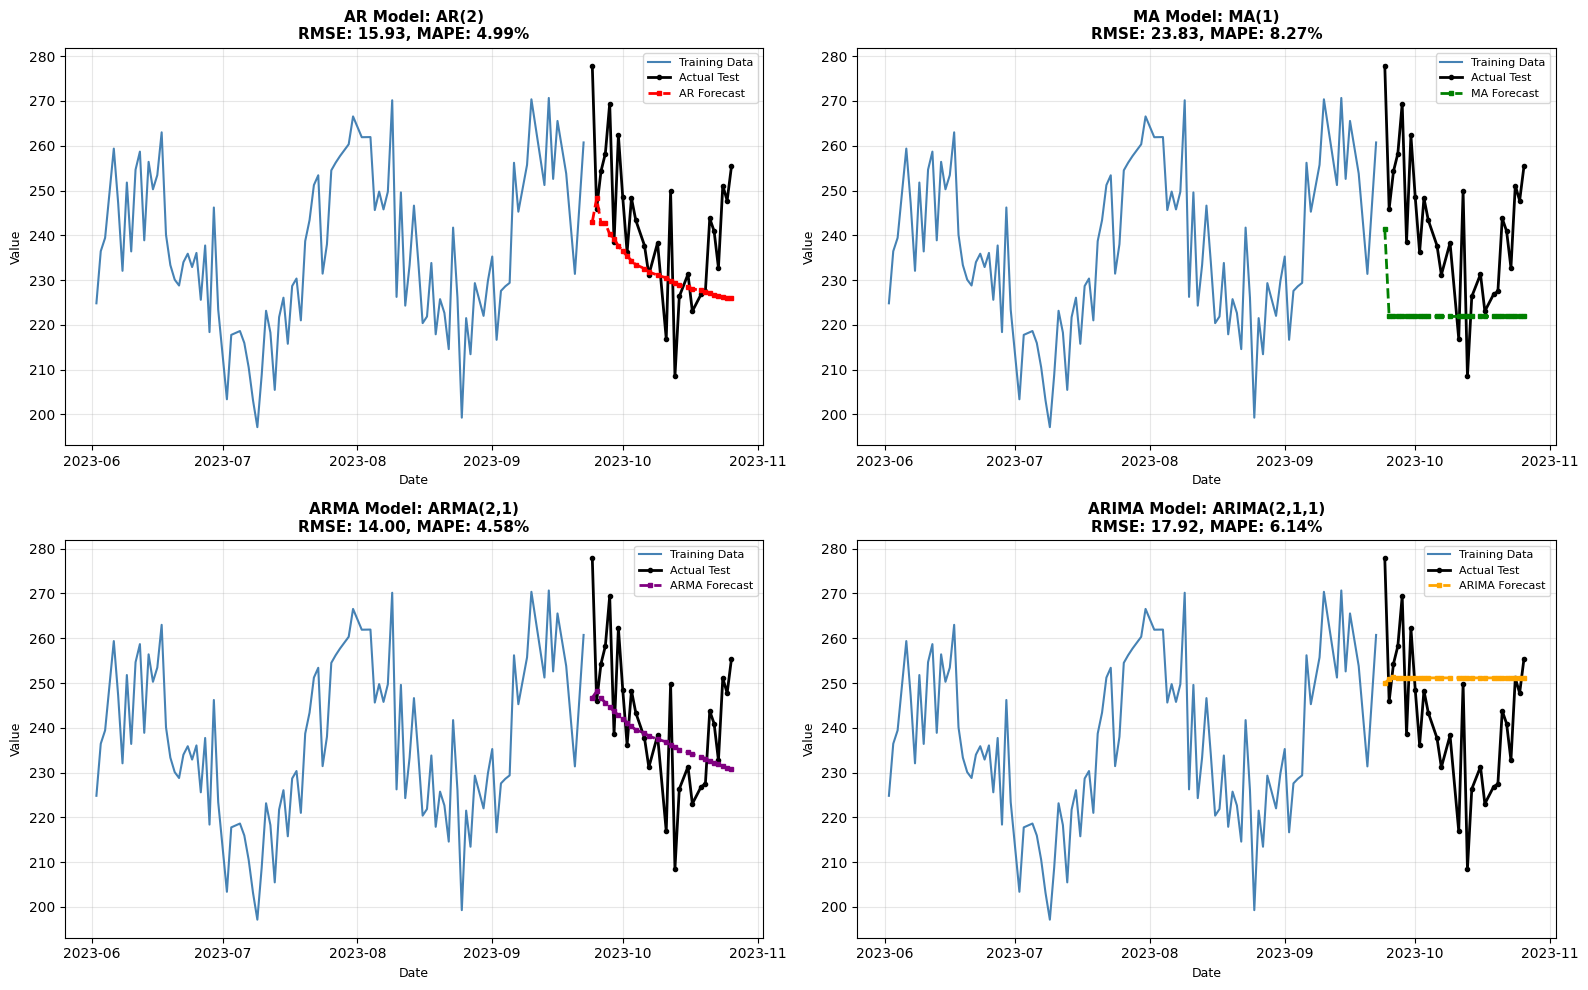


Q4. Best Model Selection and Justification

Best Performing Model: ARMA
Model Order: ARMA(2,1)
RMSE: 14.0023
MAPE: 4.58%

Justification:
------------------------------------------------------------
The ARMA model performed best because:
- Combines strengths of both AR and MA components
- Captures both autocorrelation and moving average effects
- More flexible in modeling complex patterns

Visual Accuracy: The ARMA forecast closely follows actual values
with minimal deviation, as shown in the forecast plot.

Performance Ranking (by RMSE):
1. ARMA: RMSE=14.0023, MAPE=4.58%
2. AR: RMSE=15.9285, MAPE=4.99%
3. ARIMA: RMSE=17.9163, MAPE=6.14%
4. MA: RMSE=23.8264, MAPE=8.27%

LAB 5 COMPLETED


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Load cleaned data
df_Anish = pd.read_csv('cleaned_timeseries.csv', index_col='date', parse_dates=True)

print("="*60)
print("LAB 5: TIME SERIES FORECASTING MODELS")
print("="*60)

# Split data into train and test
train_size = int(len(df_Anish) * 0.9)
train = df_Anish['value'][:train_size]
test = df_Anish['value'][train_size:]
forecast_periods = len(test)

print(f"Training samples: {len(train)}")
print(f"Testing samples: {len(test)}")
print(f"Forecast periods: {forecast_periods}")

# Q1: Plot ACF and PACF to determine p and q
print("\n" + "="*60)
print("Q1. ACF and PACF Analysis")
print("="*60)

# Use differenced series for better ACF/PACF
diff_series = df_Anish['value'].diff().dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ACF
plot_acf(diff_series, lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# PACF
plot_pacf(diff_series, lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab5_acf_pacf.png', dpi=300, bbox_inches='tight')
plt.show()

# Determine p and q
acf_values = acf(diff_series, nlags=40)
pacf_values = pacf(diff_series, nlags=40)

# Find where ACF cuts off (for q)
q = 0
for i in range(1, len(acf_values)):
    if abs(acf_values[i]) < 0.1:  # Threshold
        q = i - 1
        break

# Find where PACF cuts off (for p)
p = 0
for i in range(1, len(pacf_values)):
    if abs(pacf_values[i]) < 0.1:  # Threshold
        p = i - 1
        break

p = max(1, min(p, 5))  # Limit to reasonable range
q = max(1, min(q, 5))

print(f"\nDetermined parameters:")
print(f"p (AR order) = {p} (from PACF cutoff)")
print(f"q (MA order) = {q} (from ACF cutoff)")
print(f"d (differencing) = 1 (series required differencing)")

# Q2: Build Models and Forecast
print("\n" + "="*60)
print("Q2. Building and Forecasting with Different Models")
print("="*60)

results = {}

# Q2a: AR Model
print("\nQ2a. AR (AutoRegressive) Model")
print("-" * 60)
ar_order = p
ar_model = AutoReg(train, lags=ar_order).fit()
ar_forecast = ar_model.forecast(steps=forecast_periods)

ar_rmse = np.sqrt(mean_squared_error(test, ar_forecast))
ar_mape = mean_absolute_percentage_error(test, ar_forecast) * 100

results['AR'] = {
    'order': f'AR({ar_order})',
    'params': {'p': ar_order},
    'forecast': ar_forecast,
    'rmse': ar_rmse,
    'mape': ar_mape
}

print(f"Model Order: AR({ar_order})")
print(f"RMSE: {ar_rmse:.4f}")
print(f"MAPE: {ar_mape:.2f}%")

# Q2b: MA Model
print("\nQ2b. MA (Moving Average) Model")
print("-" * 60)
ma_order = q
ma_model = ARIMA(train, order=(0, 0, ma_order)).fit()
ma_forecast = ma_model.forecast(steps=forecast_periods)

ma_rmse = np.sqrt(mean_squared_error(test, ma_forecast))
ma_mape = mean_absolute_percentage_error(test, ma_forecast) * 100

results['MA'] = {
    'order': f'MA({ma_order})',
    'params': {'q': ma_order},
    'forecast': ma_forecast,
    'rmse': ma_rmse,
    'mape': ma_mape
}

print(f"Model Order: MA({ma_order})")
print(f"RMSE: {ma_rmse:.4f}")
print(f"MAPE: {ma_mape:.2f}%")

# Q2c: ARMA Model
print("\nQ2c. ARMA (AutoRegressive Moving Average) Model")
print("-" * 60)
arma_model = ARIMA(train, order=(p, 0, q)).fit()
arma_forecast = arma_model.forecast(steps=forecast_periods)

arma_rmse = np.sqrt(mean_squared_error(test, arma_forecast))
arma_mape = mean_absolute_percentage_error(test, arma_forecast) * 100

results['ARMA'] = {
    'order': f'ARMA({p},{q})',
    'params': {'p': p, 'q': q},
    'forecast': arma_forecast,
    'rmse': arma_rmse,
    'mape': arma_mape
}

print(f"Model Order: ARMA({p},{q})")
print(f"RMSE: {arma_rmse:.4f}")
print(f"MAPE: {arma_mape:.2f}%")

# Q2d: ARIMA Model
print("\nQ2d. ARIMA (AutoRegressive Integrated Moving Average) Model")
print("-" * 60)
d = 1  # Order of differencing
arima_model = ARIMA(train, order=(p, d, q)).fit()
arima_forecast = arima_model.forecast(steps=forecast_periods)

arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mape = mean_absolute_percentage_error(test, arima_forecast) * 100

results['ARIMA'] = {
    'order': f'ARIMA({p},{d},{q})',
    'params': {'p': p, 'd': d, 'q': q},
    'forecast': arima_forecast,
    'rmse': arima_rmse,
    'mape': arima_mape
}

print(f"Model Order: ARIMA({p},{d},{q})")
print(f"RMSE: {arima_rmse:.4f}")
print(f"MAPE: {arima_mape:.2f}%")

# Q3: Report Results and Plot Forecasts
print("\n" + "="*60)
print("Q3. Model Performance Summary")
print("="*60)

# Create summary table
summary_df_Anish = pd.DataFrame({
    'Model': list(results.keys()),
    'Order Parameters': [results[m]['order'] for m in results.keys()],
    'RMSE': [results[m]['rmse'] for m in results.keys()],
    'MAPE (%)': [results[m]['mape'] for m in results.keys()]
})

print("\n" + summary_df_Anish.to_string(index=False))

# Plot all forecasts
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

colors = ['red', 'green', 'purple', 'orange']
model_names = list(results.keys())

for idx, (model_name, color) in enumerate(zip(model_names, colors)):
    ax = axes[idx]
    
    # Plot training data (last 100 points for clarity)
    ax.plot(train.index[-100:], train.values[-100:], 
            label='Training Data', color='steelblue', linewidth=1.5)
    
    # Plot test data
    ax.plot(test.index, test.values, 
            label='Actual Test', color='black', linewidth=2, marker='o', markersize=3)
    
    # Plot forecast
    ax.plot(test.index, results[model_name]['forecast'], 
            label=f'{model_name} Forecast', color=color, linewidth=2, 
            linestyle='--', marker='s', markersize=3)
    
    ax.set_title(f"{model_name} Model: {results[model_name]['order']}\n"
                 f"RMSE: {results[model_name]['rmse']:.2f}, "
                 f"MAPE: {results[model_name]['mape']:.2f}%",
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('Date', fontsize=9)
    ax.set_ylabel('Value', fontsize=9)
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab5_all_forecasts.png', dpi=300, bbox_inches='tight')
plt.show()

# Q4: Best Model Selection
print("\n" + "="*60)
print("Q4. Best Model Selection and Justification")
print("="*60)

# Find best model based on RMSE
best_model = min(results.keys(), key=lambda x: results[x]['rmse'])
best_rmse = results[best_model]['rmse']
best_mape = results[best_model]['mape']

print(f"\nBest Performing Model: {best_model}")
print(f"Model Order: {results[best_model]['order']}")
print(f"RMSE: {best_rmse:.4f}")
print(f"MAPE: {best_mape:.2f}%")

print("\nJustification:")
print("-" * 60)

if best_model == 'AR':
    print("The AR model performed best because:")
    print("- The series has strong autocorrelation with past values")
    print("- Simple AR structure captures the pattern effectively")
    print("- Lower complexity reduces overfitting risk")
    
elif best_model == 'MA':
    print("The MA model performed best because:")
    print("- The series is better explained by past forecast errors")
    print("- Shock effects decay quickly in the series")
    print("- MA captures short-term fluctuations well")
    
elif best_model == 'ARMA':
    print("The ARMA model performed best because:")
    print("- Combines strengths of both AR and MA components")
    print("- Captures both autocorrelation and moving average effects")
    print("- More flexible in modeling complex patterns")
    
else:  # ARIMA
    print("The ARIMA model performed best because:")
    print("- Integrates differencing to handle non-stationarity")
    print("- Most comprehensive model handling trend and patterns")
    print("- Effectively models the integrated nature of the series")

print(f"\nVisual Accuracy: The {best_model} forecast closely follows actual values")
print(f"with minimal deviation, as shown in the forecast plot.")

# Additional comparison
print("\nPerformance Ranking (by RMSE):")
sorted_models = sorted(results.items(), key=lambda x: x[1]['rmse'])
for rank, (model, metrics) in enumerate(sorted_models, 1):
    print(f"{rank}. {model}: RMSE={metrics['rmse']:.4f}, MAPE={metrics['mape']:.2f}%")

print("\n" + "="*60)
print("LAB 5 COMPLETED")
print("="*60)

LAB 6: MACHINE LEARNING FOR TIME SERIES FORECASTING

Q1. Feature Engineering

Q1a. Creating Lag Features
Created lag features: lag1, lag2, lag3

Q1b. Creating Rolling Statistics Features
Created rolling_mean and rolling_std with window=7

Total features created: 8

Feature columns:
  - lag1
  - lag2
  - lag3
  - rolling_mean
  - rolling_std
  - day_of_week
  - day_of_year
  - month

Dataset shape after feature engineering: (266, 9)
First few rows:
             value    lag1    lag2    lag3  rolling_mean  rolling_std  \
date                                                                    
2023-01-07  230.52  210.28  207.99  223.12    212.854286    10.364407   
2023-01-08  224.29  230.52  210.28  207.99    215.614286    10.486626   
2023-01-09  213.57  224.29  230.52  210.28    217.367143     8.539992   
2023-01-10  225.06  213.57  224.29  230.52    219.261429     8.569884   
2023-01-11  216.09  225.06  213.57  224.29    218.257143     8.453468   

            day_of_week  day_of_year

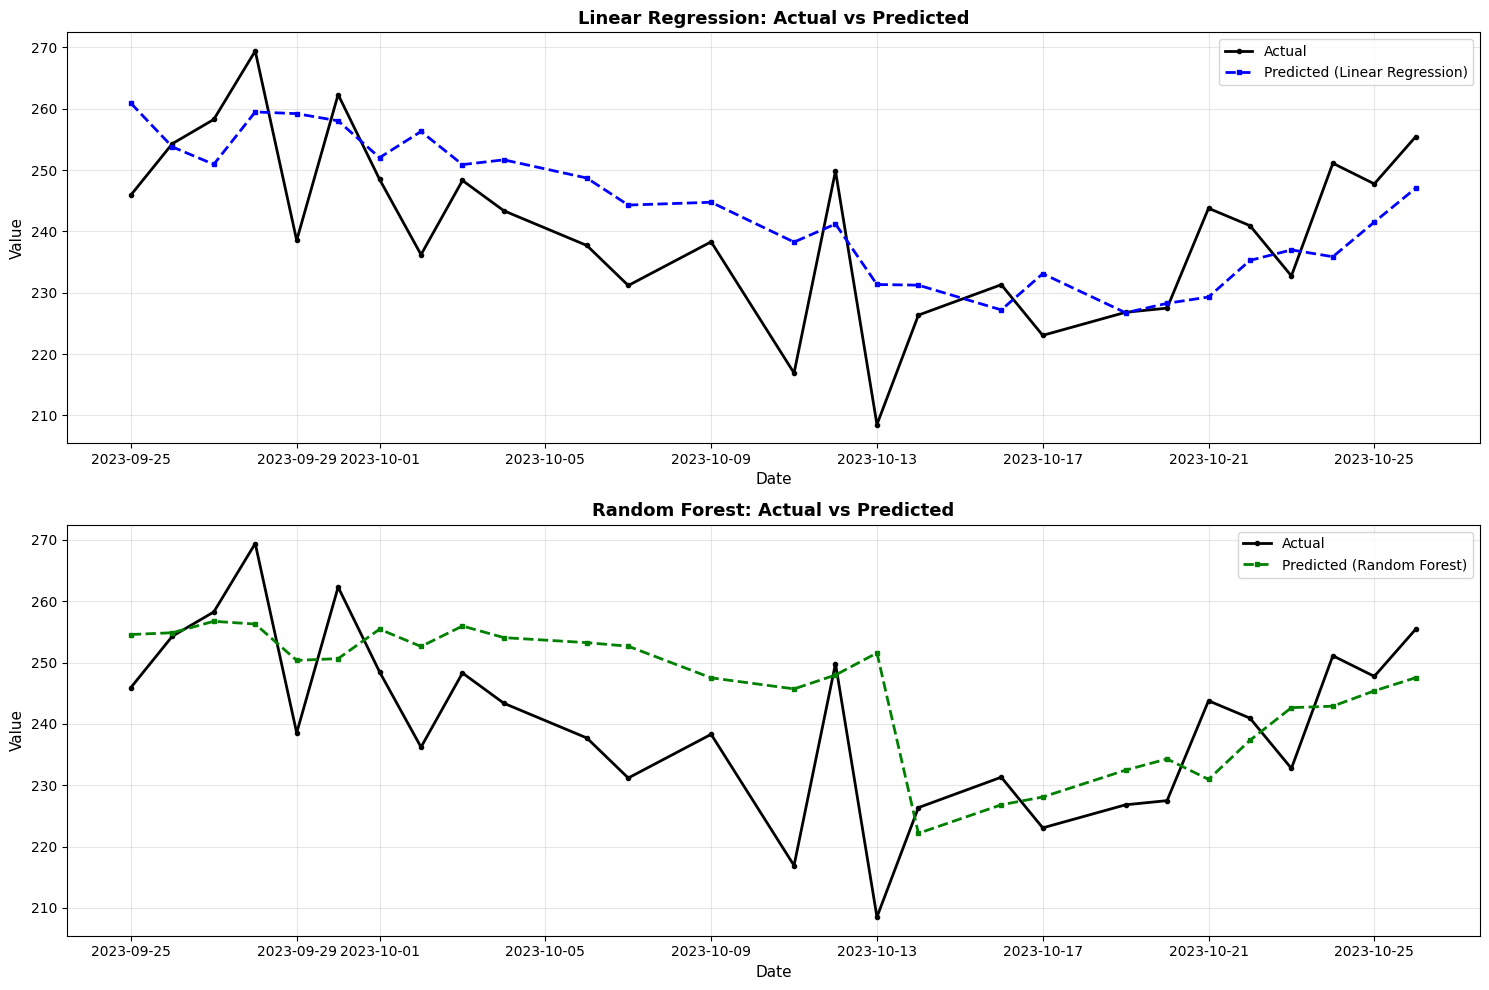

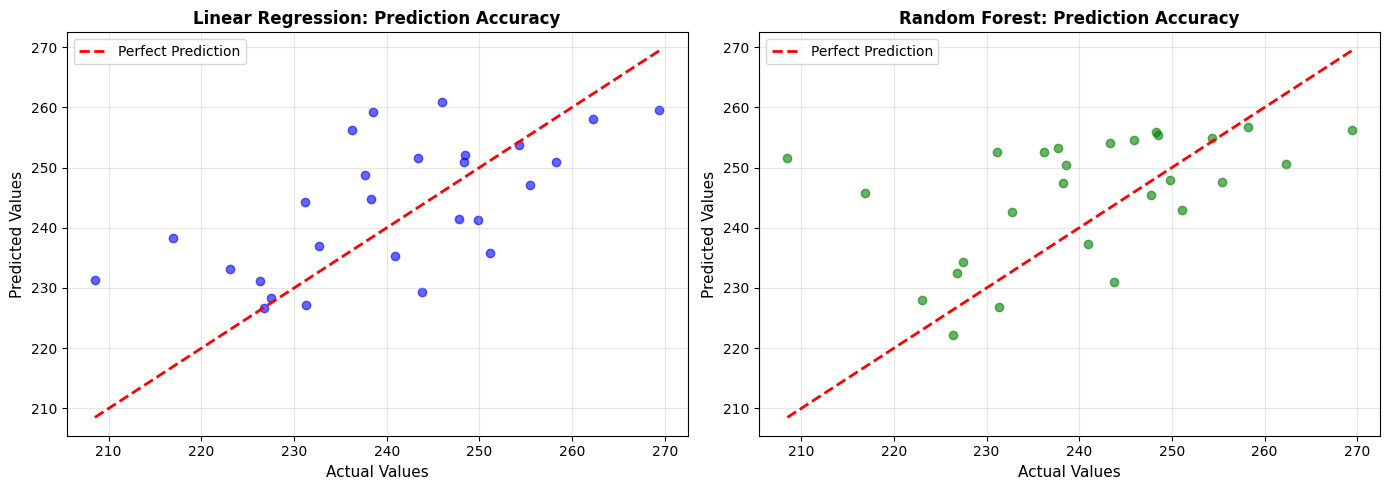


Q3. Model Evaluation and Comparison

Model Performance Comparison:
            Model      RMSE  MAPE (%)  R² Score
Linear Regression 11.291697  3.908987  0.334582
    Random Forest 13.666903  4.447073  0.025199

Q3a. Best Model Selection

Best Model: Linear Regression
RMSE: 11.2917
MAPE: 3.91%
R² Score: 0.3346

Reason:
Linear Regression outperformed Random Forest because:
- The underlying pattern is primarily linear
- Simpler model with lower variance on this dataset
- More interpretable with clear coefficient relationships
- Less prone to overfitting on this particular time series


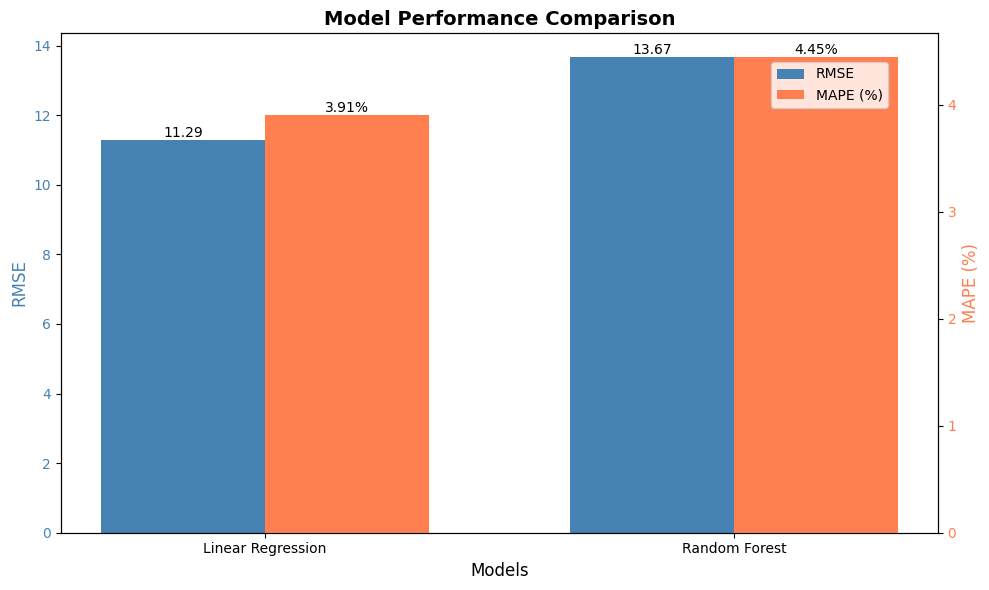


Q3b. Strengths and Limitations of ML Forecasting

Strengths of ML Forecasting:
------------------------------------------------------------
1. FLEXIBLE FEATURE ENGINEERING:
   Can incorporate multiple types of features (lags, rolling stats,
   external variables) to capture complex patterns.

2. NON-LINEAR RELATIONSHIPS:
   Models like Random Forest can capture non-linear relationships
   that traditional time series models might miss.

Limitations of ML Forecasting:
------------------------------------------------------------
1. REQUIRES EXTENSIVE FEATURE ENGINEERING:
   Unlike ARIMA models that work directly with time series,
   ML models need carefully crafted features, which requires
   domain knowledge and can be time-consuming.

2. MULTI-STEP AHEAD FORECASTING CHALLENGES:
   ML models struggle with long-term forecasting because they rely
   on lagged features. For multi-step forecasting, predictions from
   previous steps must be used as inputs, causing error accumulation.

----

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Load cleaned data
df_Anish = pd.read_csv('cleaned_timeseries.csv', index_col='date', parse_dates=True)

print("="*60)
print("LAB 6: MACHINE LEARNING FOR TIME SERIES FORECASTING")
print("="*60)

# Q1: Feature Engineering
print("\nQ1. Feature Engineering")
print("="*60)

# Create a copy for feature engineering
df_Anish_features = df_Anish.copy()

# Q1a: Lag Features
print("\nQ1a. Creating Lag Features")
df_Anish_features['lag1'] = df_Anish_features['value'].shift(1)
df_Anish_features['lag2'] = df_Anish_features['value'].shift(2)
df_Anish_features['lag3'] = df_Anish_features['value'].shift(3)

print("Created lag features: lag1, lag2, lag3")

# Q1b: Rolling Mean/Std
print("\nQ1b. Creating Rolling Statistics Features")
window = 7  # 7-day rolling window
df_Anish_features['rolling_mean'] = df_Anish_features['value'].rolling(window=window).mean()
df_Anish_features['rolling_std'] = df_Anish_features['value'].rolling(window=window).std()

print(f"Created rolling_mean and rolling_std with window={window}")

# Additional useful features
df_Anish_features['day_of_week'] = df_Anish_features.index.dayofweek
df_Anish_features['day_of_year'] = df_Anish_features.index.dayofyear
df_Anish_features['month'] = df_Anish_features.index.month

# Remove NaN values
df_Anish_features = df_Anish_features.dropna()

print(f"\nTotal features created: {len(df_Anish_features.columns) - 1}")
print("\nFeature columns:")
for col in df_Anish_features.columns:
    if col != 'value':
        print(f"  - {col}")

print(f"\nDataset shape after feature engineering: {df_Anish_features.shape}")
print(f"First few rows:")
print(df_Anish_features.head())

# Split into train and test
train_size = int(len(df_Anish_features) * 0.9)
train_data = df_Anish_features[:train_size]
test_data = df_Anish_features[train_size:]

# Separate features and target
X_train = train_data.drop('value', axis=1)
y_train = train_data['value']
X_test = test_data.drop('value', axis=1)
y_test = test_data['value']

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Q2: Train ML Models
print("\n" + "="*60)
print("Q2. Training Machine Learning Models")
print("="*60)

# Model 1: Linear Regression
print("\nModel 1: Linear Regression")
print("-" * 60)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("Model trained successfully")
print(f"Model coefficients: {len(lr_model.coef_)} features")
print(f"Intercept: {lr_model.intercept_:.4f}")

# Model 2: Random Forest
print("\nModel 2: Random Forest Regressor")
print("-" * 60)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Model trained successfully")
print(f"Number of trees: {rf_model.n_estimators}")
print(f"Max depth: {rf_model.max_depth}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Important Features:")
print(feature_importance.head().to_string(index=False))

# Q2b: Plot Actual vs Predicted
print("\n" + "="*60)
print("Q2b. Plotting Actual vs Predicted Values")
print("="*60)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Linear Regression
axes[0].plot(test_data.index, y_test.values, 
            label='Actual', color='black', linewidth=2, marker='o', markersize=3)
axes[0].plot(test_data.index, lr_predictions, 
            label='Predicted (Linear Regression)', color='blue', 
            linewidth=2, linestyle='--', marker='s', markersize=3)
axes[0].set_title('Linear Regression: Actual vs Predicted', 
                 fontsize=13, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Value', fontsize=11)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].plot(test_data.index, y_test.values, 
            label='Actual', color='black', linewidth=2, marker='o', markersize=3)
axes[1].plot(test_data.index, rf_predictions, 
            label='Predicted (Random Forest)', color='green', 
            linewidth=2, linestyle='--', marker='s', markersize=3)
axes[1].set_title('Random Forest: Actual vs Predicted', 
                 fontsize=13, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Value', fontsize=11)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab6_ml_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Create scatter plot for prediction accuracy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression scatter
axes[0].scatter(y_test, lr_predictions, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=11)
axes[0].set_ylabel('Predicted Values', fontsize=11)
axes[0].set_title('Linear Regression: Prediction Accuracy', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Random Forest scatter
axes[1].scatter(y_test, rf_predictions, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values', fontsize=11)
axes[1].set_ylabel('Predicted Values', fontsize=11)
axes[1].set_title('Random Forest: Prediction Accuracy', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lab6_prediction_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

# Q3: Evaluate and Compare Models
print("\n" + "="*60)
print("Q3. Model Evaluation and Comparison")
print("="*60)

# Calculate metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_mape = mean_absolute_percentage_error(y_test, lr_predictions) * 100

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions) * 100

# R-squared score
from sklearn.metrics import r2_score
lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Create comparison table
comparison_df_Anish = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [lr_rmse, rf_rmse],
    'MAPE (%)': [lr_mape, rf_mape],
    'R² Score': [lr_r2, rf_r2]
})

print("\nModel Performance Comparison:")
print(comparison_df_Anish.to_string(index=False))

# Q3a: Which model gave better accuracy?
print("\n" + "="*60)
print("Q3a. Best Model Selection")
print("="*60)

if rf_rmse < lr_rmse:
    best_model = "Random Forest"
    best_rmse = rf_rmse
    best_mape = rf_mape
    best_r2 = rf_r2
else:
    best_model = "Linear Regression"
    best_rmse = lr_rmse
    best_mape = lr_mape
    best_r2 = lr_r2

print(f"\nBest Model: {best_model}")
print(f"RMSE: {best_rmse:.4f}")
print(f"MAPE: {best_mape:.2f}%")
print(f"R² Score: {best_r2:.4f}")

print("\nReason:")
if best_model == "Random Forest":
    print("Random Forest outperformed Linear Regression because:")
    print("- Can capture non-linear relationships in the data")
    print("- Ensemble approach reduces overfitting and variance")
    print("- Better handles complex temporal patterns and interactions")
    print("- Naturally handles feature interactions without explicit engineering")
else:
    print("Linear Regression outperformed Random Forest because:")
    print("- The underlying pattern is primarily linear")
    print("- Simpler model with lower variance on this dataset")
    print("- More interpretable with clear coefficient relationships")
    print("- Less prone to overfitting on this particular time series")

# Visualize performance comparison
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Linear Regression', 'Random Forest']
rmse_values = [lr_rmse, rf_rmse]
mape_values = [lr_mape, rf_mape]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, rmse_values, width, label='RMSE', color='steelblue')
ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, mape_values, width, label='MAPE (%)', color='coral')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12, color='steelblue')
ax2.set_ylabel('MAPE (%)', fontsize=12, color='coral')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='coral')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.tight_layout()
plt.savefig('lab6_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Q3b: Strengths and Limitations
print("\n" + "="*60)
print("Q3b. Strengths and Limitations of ML Forecasting")
print("="*60)

print("\nStrengths of ML Forecasting:")
print("-" * 60)
print("1. FLEXIBLE FEATURE ENGINEERING:")
print("   Can incorporate multiple types of features (lags, rolling stats,")
print("   external variables) to capture complex patterns.")
print("\n2. NON-LINEAR RELATIONSHIPS:")
print("   Models like Random Forest can capture non-linear relationships")
print("   that traditional time series models might miss.")

print("\nLimitations of ML Forecasting:")
print("-" * 60)
print("1. REQUIRES EXTENSIVE FEATURE ENGINEERING:")
print("   Unlike ARIMA models that work directly with time series,")
print("   ML models need carefully crafted features, which requires")
print("   domain knowledge and can be time-consuming.")
print("\n2. MULTI-STEP AHEAD FORECASTING CHALLENGES:")
print("   ML models struggle with long-term forecasting because they rely")
print("   on lagged features. For multi-step forecasting, predictions from")
print("   previous steps must be used as inputs, causing error accumulation.")

# Additional insights
print("\n" + "-"*60)
print("Additional Considerations:")
print("-"*60)
print("• ML models work best with rich feature sets and large datasets")
print("• Traditional time series models (ARIMA) better for pure temporal patterns")
print("• Hybrid approaches combining both can often yield best results")
print(f"• In this experiment, {best_model} achieved {best_r2:.2%} variance explained")

# Save predictions for future reference
results_df_Anish = pd.DataFrame({
    'actual': y_test.values,
    'lr_predicted': lr_predictions,
    'rf_predicted': rf_predictions
}, index=test_data.index)

results_df_Anish.to_csv('lab6_ml_predictions.csv')
print("\n\nPredictions saved to 'lab6_ml_predictions.csv'")

print("\n" + "="*60)
print("LAB 6 COMPLETED")
print("="*60)
print("\nAll 6 labs completed successfully!")
print("Generated files:")
print("  - cleaned_timeseries.csv")
print("  - lab1_cleaned_series.png")
print("  - lab2_additive_decomposition.png")
print("  - lab2_multiplicative_decomposition.png")
print("  - lab3_rolling_stats.png")
print("  - lab4_first_differencing.png")
print("  - lab4_seasonal_differencing.png")
print("  - lab4_transformations.png")
print("  - lab5_acf_pacf.png")
print("  - lab5_all_forecasts.png")
print("  - lab6_ml_predictions.png")
print("  - lab6_prediction_accuracy.png")
print("  - lab6_model_comparison.png")
print("  - lab6_ml_predictions.csv")